## Setup
The following few lines setup the codes we'll need

In [ ]:
using ApproxFun # if this isn't there, use Pkg.add("ApproxFun")
Pkg.add("PlotlyJS")

In [2]:
include("simple_gradient_descent.jl")

gradient_descent_2

In [3]:
using Optim
Optim.UnconstrainedProblems.examples["Rosenbrock"]

INFO: Recompiling stale cache file /Users/dgleich/.julia/lib/v0.5/Optim.ji for module Optim.


Optim.UnconstrainedProblems.OptimizationProblem("Rosenbrock",Optim.UnconstrainedProblems.rosenbrock,Optim.UnconstrainedProblems.rosenbrock_gradient!,Optim.UnconstrainedProblems.rosenbrock_hessian!,[0.0,0.0],[1.0,1.0],true,true)

In [4]:
# These codes turn f and g into one function ... 
function opt_combine(x, f, g!)
    g = Vector{Float64}(length(x))
    g!(x,g)
    return (f(x), g)
end
function opt_problem(p::Optim.UnconstrainedProblems.OptimizationProblem)
    return x -> opt_combine(x, p.f, p.g!)
end
# this just makes it easy to use
opt_problem(s::AbstractString) = opt_problem(
    Optim.UnconstrainedProblems.examples[s])

# Here's an example 
fg = opt_problem("Rosenbrock")
f, g = fg([0.0,0.0]) # show the function and gradient

(1.0,[-2.0,0.0])

In [5]:
using Plots
ezcontour(x, y, f) = begin
    X = repmat(x', length(y), 1)
    Y = repmat(y, 1, length(x))
    # Evaluate each f(x, y)
    Z = map((x,y) -> f([x,y]), X, Y)
    plot(x, y, Z, st=:contour)
end

ezcontour (generic function with 1 method)

## Working on the Rosenbrock function

In [6]:
# Try using xnext = xk - gradient(xk)
fg = opt_problem("Rosenbrock")
histx = Vector{Vector{Float64}}()
x,fx,gx,hist = gradient_descent_1(fg, [0.0,0.0]; 
    maxiter=5000, histx=histx, gamma = 1.0)

    iter        val     normg     fdiff
       1   1.00e+00  2.00e+00       Inf
       2   1.60e+03  3.20e+03 -1.60e+03
       3   1.05e+16  1.31e+13 -1.05e+16
       4   2.95e+54  9.01e+41 -2.95e+54
       5  6.58e+169 2.92e+128 -6.58e+169
       6        Inf       Inf      -Inf


([2.92095e128,1.62183e86],Inf,[Inf,-1.70639e259],
[1.0 1601.0 … 6.57585e169 Inf; 2.0 3202.0 … 2.92095e128 Inf])

INFO: Recompiling stale cache file /Users/dgleich/.julia/lib/v0.5/PyPlot.ji for module PyPlot.
/Users/dgleich/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')



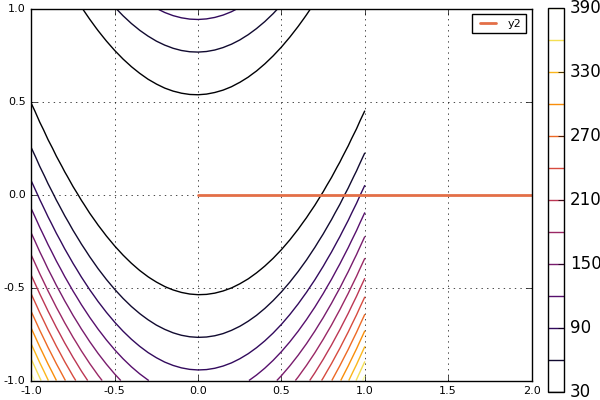

/Users/dgleich/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [7]:
ezcontour(-1:0.05:1, -1:0.05:1, 
    Optim.UnconstrainedProblems.examples["Rosenbrock"].f)
histx = histx[1:3]
plot!(map(first,histx),map(x->x[2], histx), linewidth=2)

In [8]:
# Try using xnext = xk - 0.01*gradient(xk)
fg = opt_problem("Rosenbrock")
histx = Vector{Vector{Float64}}()
x,fx,gx,hist = gradient_descent_1(fg, [0.0,0.0]; 
    maxiter=5000, histx=histx, gamma = 0.01)

    iter        val     normg     fdiff
       1   1.00e+00  2.00e+00       Inf
       2   9.60e-01  1.96e+00  3.96e-02
       3   9.22e-01  1.91e+00  3.79e-02
       4   8.86e-01  1.86e+00  3.62e-02
       5   8.52e-01  1.80e+00  3.45e-02
       6   8.19e-01  1.74e+00  3.28e-02
       7   7.88e-01  1.69e+00  3.12e-02
       8   7.58e-01  1.63e+00  2.96e-02
       9   7.30e-01  1.57e+00  2.80e-02
      10   7.04e-01  1.52e+00  2.65e-02
      11   6.78e-01  1.46e+00  2.51e-02
      12   6.55e-01  1.41e+00  2.38e-02
      13   6.32e-01  1.36e+00  2.25e-02
      14   6.11e-01  1.31e+00  2.13e-02
      15   5.91e-01  1.26e+00  2.02e-02
      16   5.71e-01  1.21e+00  1.92e-02
      17   5.53e-01  1.17e+00  1.82e-02
      18   5.36e-01  1.13e+00  1.73e-02
      19   5.20e-01  1.10e+00  1.64e-02
      20   5.04e-01  1.04e+00  1.56e-02
      21   4.89e-01  1.04e+00  1.49e-02
      22   4.75e-01  9.43e-01  1.41e-02
      23   4.62e-01  1.04e+00  1.35e-02
      24   4.49e-01  8.57e-01  1.28e-02


([1.45333e178,4.72679e118],Inf,[Inf,-Inf],
[1.0 0.960416 … 5.58563e238 Inf; 2.0 1.9568 … 1.45333e180 Inf])


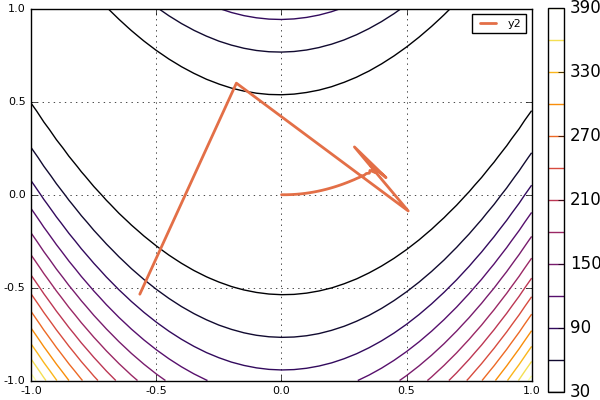

In [9]:
ezcontour(-1:0.05:1, -1:0.05:1, 
    Optim.UnconstrainedProblems.examples["Rosenbrock"].f)
histx = histx[1:35]
plot!(map(first,histx),map(x->x[2], histx), linewidth=2)

In [10]:
# Try using xnext = xk - 0.0001*gradient(xk)
fg = opt_problem("Rosenbrock")
histx = Vector{Vector{Float64}}()
x,fx,gx,hist = gradient_descent_1(fg, [0.0,0.0]; 
    maxiter=5000, histx=histx, gamma = 0.0001)

    iter        val     normg     fdiff
       1   1.00e+00  2.00e+00       Inf
       2   1.00e+00  2.00e+00  4.00e-04
       3   9.99e-01  2.00e+00  4.00e-04
       4   9.99e-01  2.00e+00  4.00e-04
       5   9.98e-01  2.00e+00  3.99e-04
       6   9.98e-01  2.00e+00  3.99e-04
       7   9.98e-01  2.00e+00  3.99e-04
       8   9.97e-01  2.00e+00  3.99e-04
       9   9.97e-01  2.00e+00  3.99e-04
      10   9.96e-01  2.00e+00  3.99e-04
      11   9.96e-01  2.00e+00  3.99e-04
      12   9.96e-01  2.00e+00  3.98e-04
      13   9.95e-01  2.00e+00  3.98e-04
      14   9.95e-01  1.99e+00  3.98e-04
      15   9.94e-01  1.99e+00  3.98e-04
      16   9.94e-01  1.99e+00  3.98e-04
      17   9.94e-01  1.99e+00  3.98e-04
      18   9.93e-01  1.99e+00  3.97e-04
      19   9.93e-01  1.99e+00  3.97e-04
      20   9.92e-01  1.99e+00  3.97e-04
      21   9.92e-01  1.99e+00  3.97e-04
      22   9.92e-01  1.99e+00  3.97e-04
      23   9.91e-01  1.99e+00  3.97e-04
      24   9.91e-01  1.99e+00  3.96e-04


([0.508352,0.255958],0.24232479180835162,[-0.482261,-0.492803],
[1.0 0.9996 … 0.242372 0.242325; 2.0 1.9996 … 0.492852 0.492803])


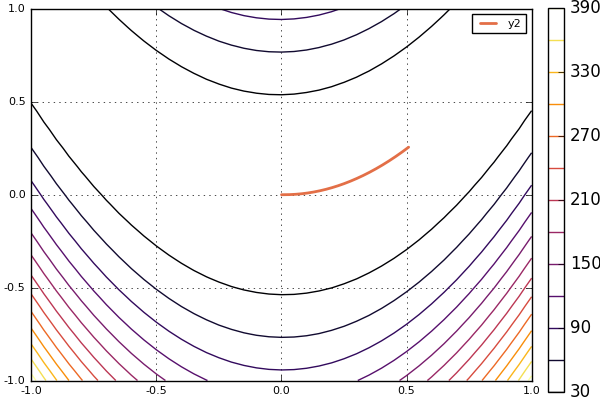

In [11]:
ezcontour(-1:0.05:1, -1:0.05:1, 
    Optim.UnconstrainedProblems.examples["Rosenbrock"].f)
plot!(map(first,histx),map(x->x[2], histx), linewidth=2)

## Rosenbrock with scaled gradients

In [12]:
fg = opt_problem("Rosenbrock")
histx = Vector{Vector{Float64}}()
x,f,g,hist = gradient_descent_2(fg, [0.0,0.0]; 
    maxiter=100, histx=histx, gamma=1.0)

    iter        val     normg     fdiff
       1   1.00e+00  2.00e+00       Inf
       2   1.00e+02  4.00e+02 -9.90e+01
       3   1.98e+01  8.72e+01  8.02e+01
       4   4.10e+01  1.27e+02 -2.12e+01
       5   8.47e+00  5.29e+01  3.25e+01
       6   9.30e+01  2.21e+02 -8.46e+01
       7   6.67e-01  1.25e+00  9.24e+01
       8   5.92e+00  9.28e+01 -5.26e+00
       9   1.28e+02  2.25e+02 -1.22e+02
      10   1.56e+00  1.94e+01  1.26e+02
      11   1.42e+02  3.17e+02 -1.41e+02
      12   4.03e+00  3.31e+01  1.38e+02
      13   5.94e+01  1.53e+02 -5.54e+01
      14   1.83e+01  9.07e+01  4.11e+01
      15   2.77e+01  1.03e+02 -9.44e+00
      16   4.74e+01  1.45e+02 -1.96e+01
      17   6.66e+00  4.91e+01  4.07e+01
      18   1.00e+02  2.43e+02 -9.34e+01
      19   1.38e+00  3.62e+00  9.86e+01
      20   1.99e+01  9.54e+01 -1.85e+01
      21   2.42e+02  7.88e+02 -2.22e+02
      22   9.51e+00  6.02e+01  2.32e+02
      23   1.51e+02  4.44e+02 -1.41e+02
      24   1.50e+00  1.49e+01  1.49e+02


([0.0958799,-0.0160241],0.8810230982015401,[-0.841116,-5.04341],
[1.0 100.0 … 97.1585 0.881023; 2.0 400.0 … 196.179 5.04341])


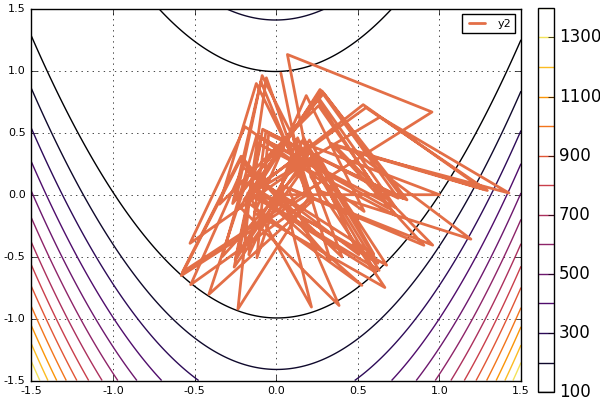

In [13]:
ezcontour(-1.5:0.01:1.5, -1.5:0.01:1.5, 
    Optim.UnconstrainedProblems.examples["Rosenbrock"].f)
plot!(map(first,histx),map(x->x[2], histx), linewidth=2)

In [14]:
fg = opt_problem("Rosenbrock")
histx = Vector{Vector{Float64}}()
x,f,g,hist = gradient_descent_2(fg, [0.0,0.0]; 
    maxiter=100, histx=histx, gamma=0.1)

    iter        val     normg     fdiff
       1   1.00e+00  2.00e+00       Inf
       2   8.20e-01  2.00e+00  1.80e-01
       3   1.04e+00  1.14e+01 -2.17e-01
       4   8.77e-01  9.71e+00  1.60e-01
       5   1.01e+00  1.15e+01 -1.30e-01
       6   8.56e-01  9.98e+00  1.51e-01
       7   9.83e-01  1.15e+01 -1.27e-01
       8   8.38e-01  1.02e+01  1.45e-01
       9   9.63e-01  1.16e+01 -1.25e-01
      10   8.23e-01  1.04e+01  1.40e-01
      11   9.46e-01  1.17e+01 -1.23e-01
      12   8.10e-01  1.06e+01  1.36e-01
      13   9.32e-01  1.18e+01 -1.22e-01
      14   7.99e-01  1.07e+01  1.33e-01
      15   9.19e-01  1.18e+01 -1.21e-01
      16   7.89e-01  1.09e+01  1.31e-01
      17   9.09e-01  1.19e+01 -1.20e-01
      18   7.80e-01  1.10e+01  1.28e-01
      19   9.00e-01  1.20e+01 -1.19e-01
      20   7.73e-01  1.11e+01  1.27e-01
      21   8.92e-01  1.21e+01 -1.19e-01
      22   7.66e-01  1.13e+01  1.25e-01
      23   8.84e-01  1.22e+01 -1.18e-01
      24   7.60e-01  1.14e+01  1.24e-01


([0.474962,0.160391],0.700734547473848,[11.3364,-13.0395],
[1.0 0.82 … 0.81556 0.700735; 2.0 2.0 … 13.6388 13.0395])


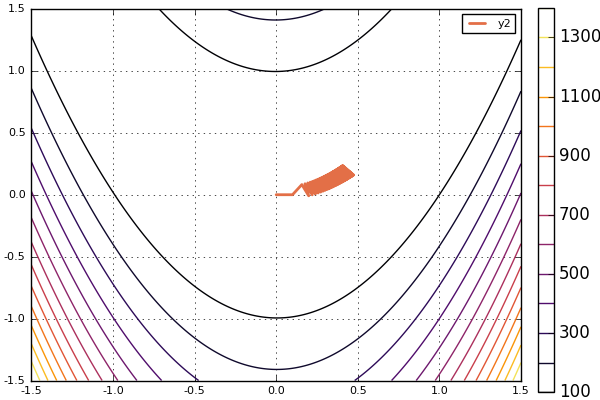

In [15]:
ezcontour(-1.5:0.01:1.5, -1.5:0.01:1.5, 
    Optim.UnconstrainedProblems.examples["Rosenbrock"].f)
plot!(map(first,histx),map(x->x[2], histx), linewidth=2)

## Rosenbrock using exact gradient descent
In this case, we otpimally solve the line-search problem using ApproxFun

In [16]:
using ApproxFun
function exact_gradient_descent(fg,x0;
    maxiter=10000,tol=1.0e-8,quiet=false,histx=[])
    
    x = copy(x0)
    n = length(x)

    hist = zeros(2,maxiter)
    savehistx = eltype(histx) == Vector{Float64} ? true : false

    f = Inf
    normg = Inf
    lastiter = 0
    g = Vector{Float64}()

    if !quiet
        @printf("  %6s  %9s %9s %9s\n", "iter", 
            "val", "normg", "fdiff");
    end

    for iter=1:maxiter
        if savehistx
            push!(histx, x)
        end
    
        if iter>1
            # Form an ApproxFun and exactly minimize it
            polyf = Fun( alpha -> fg(x - alpha*g)[1], 0..10)
            amin = indmin(polyf)
            x = x - amin*g;
        end
    
        flast = f
        f,g = fg(x)
        normg = norm(g,Inf)
       
        fdiff = flast - f
    
        if !quiet
            @printf("  %6i  %9.2e %9.2e %9.2e\n", 
                iter, f, normg, fdiff)
        end
    
        hist[:,iter] = [f; normg]
        lastiter = iter
    
        if normg <= tol 
            break 
        end
        if !isfinite(normg)
            break
        end
    end

    if lastiter < maxiter
        hist = hist[:,1:lastiter]
    end

    if normg > tol
        warn("Did not converge")
    end
    
    return x,f,g,hist
end
fg = opt_problem("Rosenbrock")
histx = Vector{Vector{Float64}}()
x,f,g,hist = exact_gradient_descent(fg, [0.0,0.0]; 
    maxiter=1000, histx=histx)

    iter        val     normg     fdiff
       1   1.00e+00  2.00e+00       Inf
       2   7.71e-01  5.20e+00  2.29e-01
       3   7.03e-01  1.68e+00  6.76e-02
       4   6.57e-01  3.73e+00  4.67e-02
       5   6.22e-01  1.58e+00  3.48e-02
       6   5.94e-01  3.08e+00  2.84e-02
       7   5.70e-01  1.51e+00  2.37e-02
       8   5.49e-01  2.69e+00  2.06e-02
       9   5.31e-01  1.46e+00  1.81e-02
      10   5.15e-01  2.42e+00  1.62e-02
      11   5.00e-01  1.41e+00  1.46e-02
      12   4.87e-01  2.22e+00  1.34e-02
      13   4.75e-01  1.38e+00  1.23e-02
      14   4.63e-01  2.06e+00  1.14e-02
      15   4.53e-01  1.35e+00  1.06e-02
      16   4.43e-01  1.93e+00  9.91e-03
      17   4.34e-01  1.32e+00  9.30e-03
      18   4.25e-01  1.82e+00  8.77e-03
      19   4.17e-01  1.29e+00  8.28e-03
      20   4.09e-01  1.73e+00  7.86e-03
      21   4.01e-01  1.27e+00  7.47e-03
      22   3.94e-01  1.65e+00  7.12e-03
      23   3.87e-01  1.24e+00  6.79e-03
      24   3.81e-01  1.58e+00  6.50e-03


([0.925573,0.856284],0.005555490460766081,[3.76378e-10,-0.0804114],
[1.0 0.77111 … 0.00557171 0.00555549; 2.0 5.20109 … 0.149288 0.0804114])


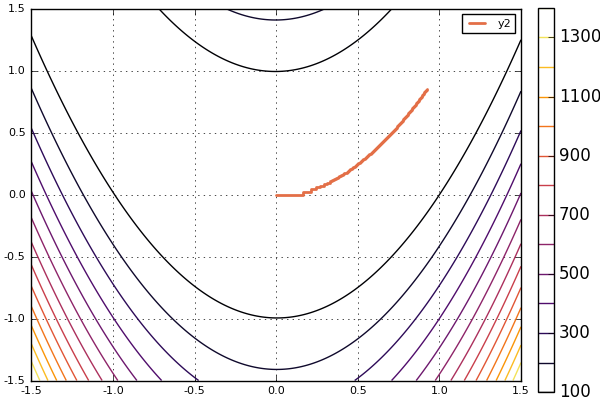

In [17]:
ezcontour(-1.5:0.01:1.5, -1.5:0.01:1.5, 
    Optim.UnconstrainedProblems.examples["Rosenbrock"].f)
plot!(map(first,histx),map(x->x[2], histx), linewidth=2)

## Another function

In [18]:
V = qr(randn(2,2),thin=false)[1] # compute the full QR factorization to get a random orthogonal matrix
Q = V*diagm([10,1e-2])*V'       # produce a mildly ill-conditioned Q
f = x -> (1/2*x'*Q*x)[1]
g = x -> Q*x
fg = x -> (f(x), g(x))
fg([1.0,1.0])

(8.024326810501279,[12.0035,4.04517])

In [19]:
histx = Vector{Vector{Float64}}()
x,fx,gx,hist = exact_gradient_descent(fg, [1.0,1.0]; 
    maxiter=1000, histx=histx)

    iter        val     normg     fdiff
       1   8.02e+00  1.20e+01       Inf
       2   1.97e-03  5.95e-03  8.02e+00
       3   1.60e-03  5.46e-03  3.75e-04
       4   1.34e-03  3.06e-02  2.57e-04
       5   1.29e-03  5.09e-03  4.94e-05
       6   1.24e-03  2.95e-02  4.75e-05
       7   1.20e-03  4.90e-03  4.58e-05
       8   1.15e-03  2.84e-02  4.41e-05
       9   1.11e-03  4.72e-03  4.25e-05
      10   1.07e-03  2.73e-02  4.09e-05
      11   1.03e-03  4.55e-03  3.94e-05
      12   9.94e-04  2.63e-02  3.80e-05
      13   9.57e-04  4.38e-03  3.66e-05
      14   9.22e-04  2.54e-02  3.52e-05
      15   8.88e-04  4.22e-03  3.39e-05
      16   8.56e-04  2.44e-02  3.27e-05
      17   8.24e-04  4.06e-03  3.15e-05
      18   7.94e-04  2.35e-02  3.03e-05
      19   7.65e-04  3.91e-03  2.92e-05
      20   7.37e-04  2.27e-02  2.81e-05
      21   7.09e-04  3.77e-03  2.71e-05
      22   6.83e-04  2.18e-02  2.61e-05
      23   6.58e-04  3.63e-03  2.51e-05
      24   6.34e-04  2.10e-02  2.42e-05


([-3.12933e-7,9.30624e-7],4.820078363155112e-15,[-1.58192e-9,9.82687e-9],
[8.02433 0.0019737 … 5.00419e-15 4.82008e-15; 12.0035 0.00595384 … 5.90978e-8 9.82687e-9])


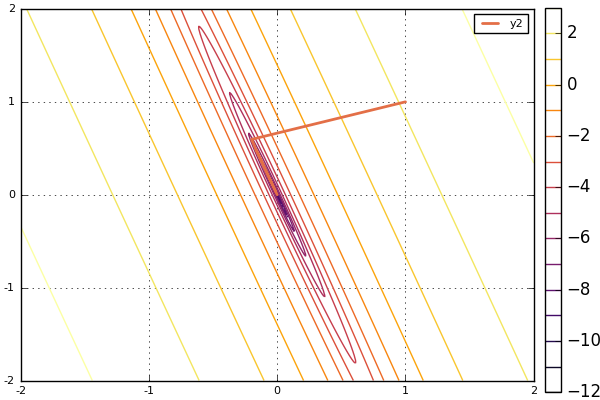

In [20]:
ezcontour(-2:0.01:2, -2:0.01:2, x -> log(f(x)))
plot!(map(first,histx),map(x->x[2], histx), linewidth=2)